### Домашнее задание по лекции 3:

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [426]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [380]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [383]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [378]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [382]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [351]:
X_st[2, :].std()

0.9999999999999999

In [352]:
def calc_logloss(y, y_pred):
    y_pred_min = 1e-4
    y_pred_max = 1 - 1e-4
    y_pred = np.clip(y_pred, y_pred_min, y_pred_max)
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [353]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [354]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    if i % (iterations / 10) == 0:
        print(i, W, err)
    return W

In [355]:
eval_model(X_st, y, iterations=100000, alpha=1e-5)

100000 [ 0.25809285 -0.68188567  0.6883469   1.2412009 ] 0.5906726973128931


array([ 0.25809285, -0.68188567,  0.6883469 ,  1.2412009 ])

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [356]:
def eval_model(X, y, iterations, alpha=1e-4, tolerance = 1e-6):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    logloss = []
    weights = []
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W = W - alpha * (1/n * np.dot((y_pred - y), X.T))
        weights.append(W)
        logloss.append(err)
        
        
        if i > 2:
            if np.abs(logloss[i-1] - logloss[i-2]) < tolerance:
                break
    
    return logloss, weights

In [357]:
def plot_err(logloss, weights):
    fig= plt.figure(figsize=(15,5))
    plt.suptitle(f'Optional rounds: {len(logloss)}, Errors: {round(logloss[-1], 2)}', size = 15)
    
    plt.subplot(121)
    plt.plot(logloss, linewidth = 3)
    plt.xlabel('n_iterations', size = 15)
    plt.ylabel('error', size = 15)
    
    plt.subplot(122)
    plt.plot(weights, linewidth = 3)
    plt.legend([f'$w_{i}$' for i in range(len(weights[0]))], loc = 'best',fontsize = 15)
    plt.xlabel('n_iterations', size = 15)
    plt.ylabel('w', size = 15)
    plt.show()

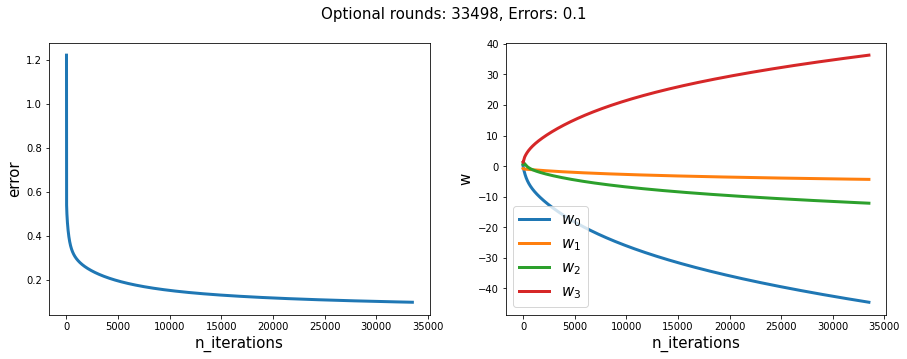

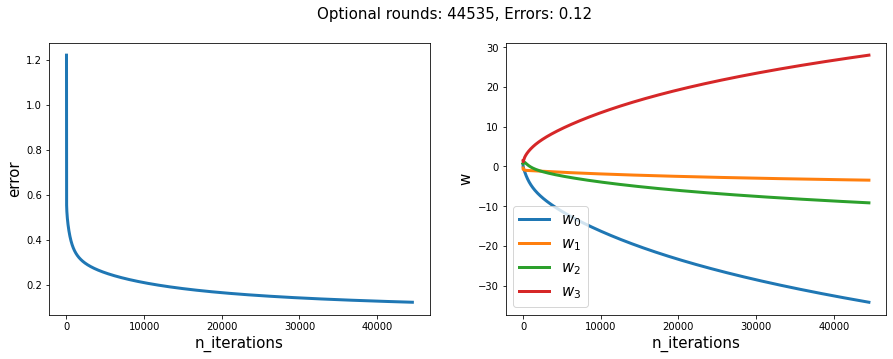

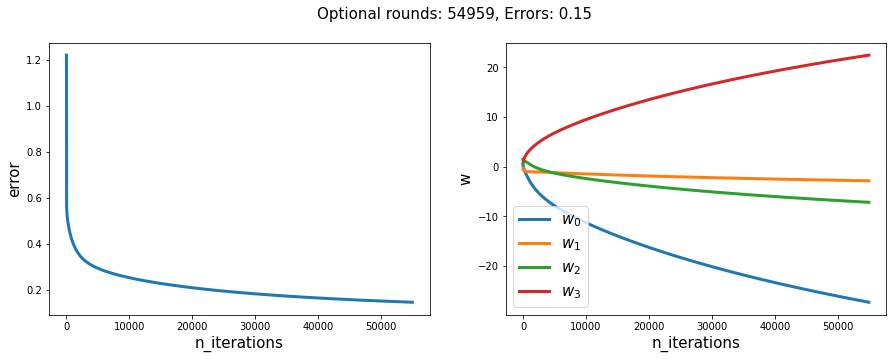

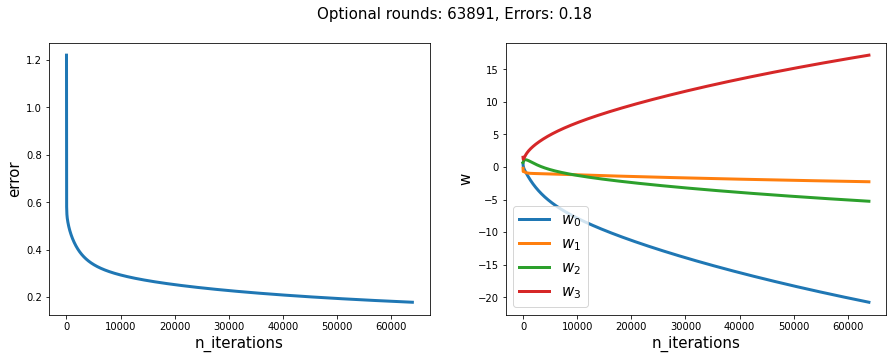

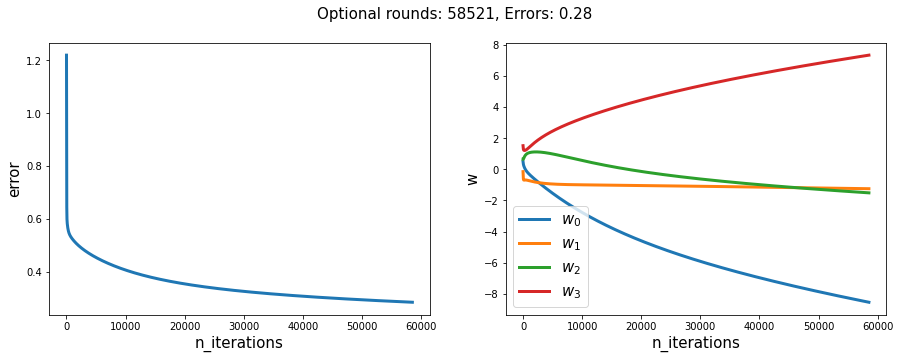

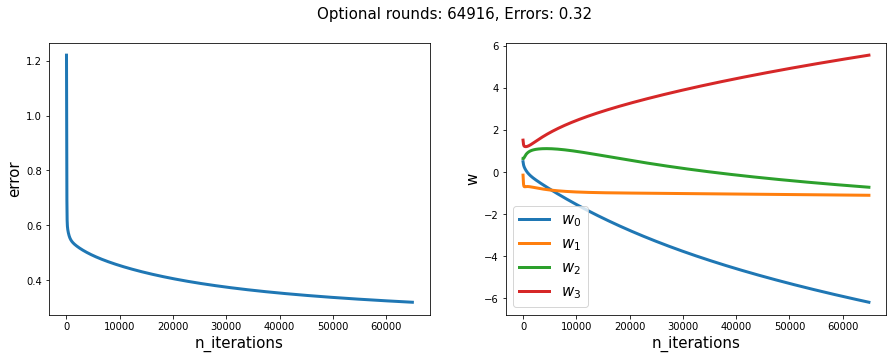

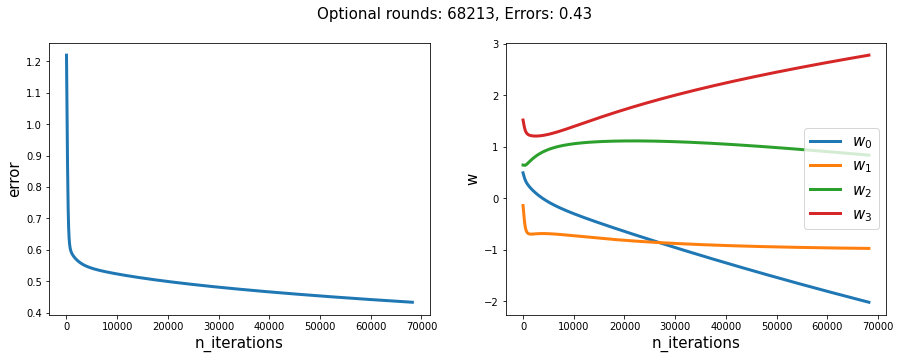

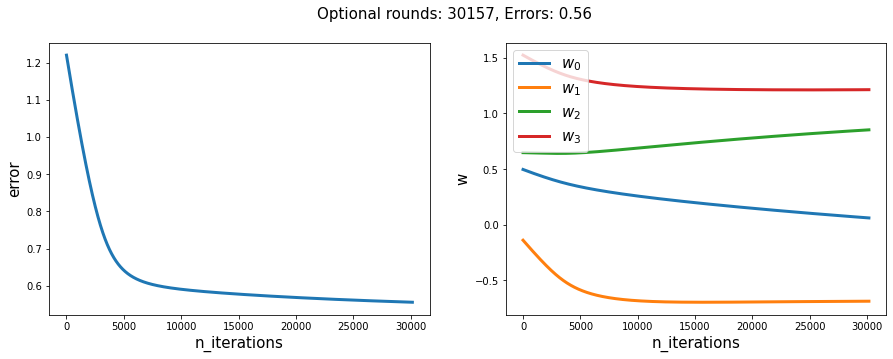

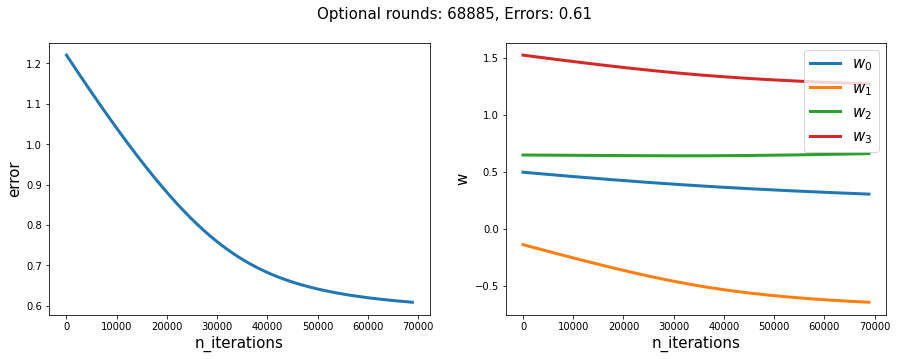

In [358]:
for alpha in [0.5, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0001, 0.00001]:
    W = eval_model(X_st, y, iterations=100000, alpha=alpha, tolerance = 1e-6)
    plot_err(W[0], W[1])

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [360]:
def calc_pred_proba(W, X):
    z = np.dot(W,X)
    return 1/(1 + np.exp(-z))

In [369]:
W = eval_model(X_st, y, iterations=100000, alpha=0.5, tolerance = 1e-6)

In [385]:
calc_pred_proba(W[1][-1], X_st)

array([0.33657718, 0.00339617, 1.        , 0.03991975, 0.96077451,
       0.02090311, 1.        , 0.00994178, 0.63926958, 0.99999999])

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [388]:
def calc_pred(W, X, treshold = 0.5):
    y_pred = calc_pred_proba(W, X)
    y_pred = np.where(y_pred > treshold, 1, 0 )
    return y_pred

In [390]:
y_pred = calc_pred(W[1][-1], X_st)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [396]:
accuracy = np.sum(y_pred)/y_pred.shape[0] # accuracy
accuracy

0.5

In [415]:
conf_matrix = np.array(pd.crosstab(y, y_pred)) # матрица ошибок
conf_matrix

array([[5, 0],
       [0, 5]])

In [416]:
precition = conf_matrix[1,1]/(conf_matrix[1,1] + conf_matrix[0,1]) # точность 
precition

1.0

In [417]:
recall = conf_matrix[1,1]/(conf_matrix[1,1] + conf_matrix[1,0]) # полнота
recall

1.0

In [419]:
F = 2 * precition * recall / (precition + recall)
F

1.0

6. Могла ли модель переобучиться? Почему? 

могла бы если бы:
1. в истинных значениях были выбросы и мы не делали регуляризацию, 
2. было мало данных
3. была сильная кореляция в данных

7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [420]:
def eval_model(X, y, iterations, alpha=1e-4, tolerance = 1e-6, l1 = 0, l2 = 0):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    logloss = []
    weights = []
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W = W - alpha * (1/n * np.dot((y_pred - y), X.T)) + 2*l2*W + 0.5*l1*W/np.abs(W)
        weights.append(W)
        logloss.append(err)
        
        
        if i > 2:
            if np.abs(logloss[i-1] - logloss[i-2]) < tolerance:
                break
    
    return logloss, weights

In [431]:
params = { 
    'c':[100, 50, 30, 10, 1, 0.1, 0.01, 0.001, 0.0001],
    'alpha': [0.5, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0001, 0.00001]
}

error_history_params = []

for c in tqdm(params['c']):
    error_by_c = []
    
    for lr in params['alpha']:
        logloss, weights = eval_model(
            X_st, y, 
            iterations = 10000, 
            alpha=lr, 
            tolerance = 1e-6, 
            l1 = c
        )
        error_by_c.append(np.min(logloss))
    error_history_params.append(error_by_c) 

  0%|          | 0/9 [00:00<?, ?it/s]<ipython-input-353-304f158d4adf>:2: RuntimeWarning: overflow encountered in exp
  res = 1 / (1 + np.exp(-z))
100%|██████████| 9/9 [00:12<00:00,  1.42s/it]


In [432]:
scores_history = pd.DataFrame(
    error_history_params,
    index=params['alpha'],
    columns=params['c'])

In [437]:
import seaborn as sns

Text(51.0, 0.5, '$eta$')

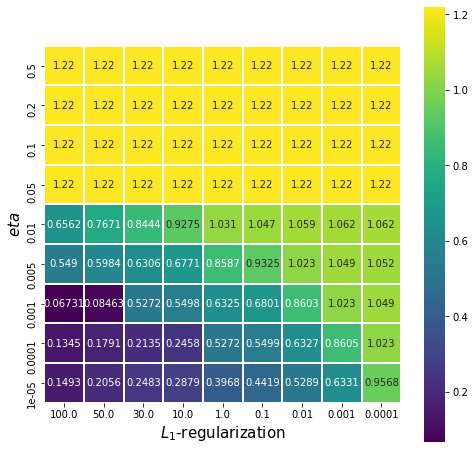

In [439]:
import seaborn as sns
fig, axes = plt.subplots(1, 1, figsize = (8, 8))
sns.heatmap(scores_history, cmap='viridis', annot=True, fmt='.4g', linewidths=1, square=True, ax=axes)
axes.set_xlabel('$L_1$-regularization', fontsize = 15)
axes.set_ylabel('$eta$', fontsize = 15)

In [440]:
params = { 
    'c':[100, 50, 30, 10, 1, 0.1, 0.01, 0.001, 0.0001],
    'alpha': [0.5, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0001, 0.00001]
}

error_history_params = []

for c in tqdm(params['c']):
    error_by_c = []
    
    for lr in params['alpha']:
        logloss, weights = eval_model(
            X_st, y, 
            iterations = 10000, 
            alpha=lr, 
            tolerance = 1e-6, 
            l2 = c
        )
        error_by_c.append(np.min(logloss))
    error_history_params.append(error_by_c) 

  0%|          | 0/9 [00:00<?, ?it/s]<ipython-input-353-304f158d4adf>:2: RuntimeWarning: overflow encountered in exp
  res = 1 / (1 + np.exp(-z))
100%|██████████| 9/9 [00:04<00:00,  2.11it/s]


In [441]:
scores_history = pd.DataFrame(
    error_history_params,
    index=params['alpha'],
    columns=params['c'])

Text(51.0, 0.5, '$eta$')

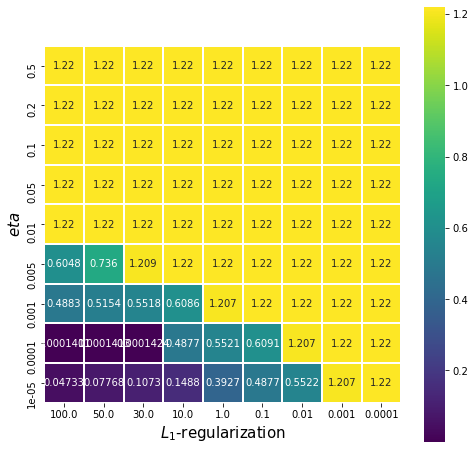

In [442]:
import seaborn as sns
fig, axes = plt.subplots(1, 1, figsize = (8, 8))
sns.heatmap(scores_history, cmap='viridis', annot=True, fmt='.4g', linewidths=1, square=True, ax=axes)
axes.set_xlabel('$L_1$-regularization', fontsize = 15)
axes.set_ylabel('$eta$', fontsize = 15)